In [1]:
library(readr)
library(bsts)

Warning message:
"package 'readr' was built under R version 4.0.3"
Warning message:
"package 'bsts' was built under R version 4.0.3"
Loading required package: BoomSpikeSlab

Warning message:
"package 'BoomSpikeSlab' was built under R version 4.0.3"
Loading required package: Boom

Warning message:
"package 'Boom' was built under R version 4.0.3"
Loading required package: MASS


Attaching package: 'Boom'


The following object is masked from 'package:stats':

    rWishart



Attaching package: 'BoomSpikeSlab'


The following object is masked from 'package:stats':

    knots


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: xts


Attaching package: 'bsts'


The following object is masked from 'package:BoomSpikeSlab':

    SuggestBurn




# Outline

1. SST data with covariates
2. Use `bsts` to:
- Fit structural model with regression
- Forecast
- Custom regression plot

# SST Data

- SST near Gibraltar
- Aggregated monthly
- January 2004 to November 2007
- Covariates: 10 m thick water layers at 10, 20, $\cdots$, 90 meters

In [2]:
gib <- read_csv("./data/gilbralter_time_series_r_2.csv")
head(gib)


-- Column specification --------------------------------------------------------
cols(
  timeIdx = col_double(),
  `0` = col_double(),
  startDate = col_date(format = ""),
  `10` = col_double(),
  `20` = col_double(),
  `30` = col_double(),
  `40` = col_double(),
  `50` = col_double(),
  `60` = col_double(),
  `70` = col_double(),
  `80` = col_double(),
  `90` = col_double()
)




timeIdx 0        startDate  10       20       30       40       50      
1 0       17.16350 2004-01-01 17.13767 17.12700 17.12233 17.11667 17.08533
2 1       17.15525 2004-02-04 17.03225 17.00650 16.96175 16.91225 16.86175
3 2       17.30200 2004-03-09 17.12400 17.02533 16.92900 16.78975 16.73575
4 3       17.50700 2004-04-12 17.12456 17.10000 17.04656 16.98300 16.92089
5 4       18.60500 2004-05-15 18.38300 17.91400 17.56489 17.29556 17.04333
6 5       21.71833 2004-06-17 21.07033 20.22356 18.97225 18.11050 17.64488
  60       70       80       90      
1 17.03967 16.98467 16.83800 16.56000
2 16.79425 16.76700 16.65075 16.52350
3 16.66925 16.75680 16.70300 16.58000
4 16.81011 16.73733 16.66911 16.57533
5 16.84133 16.70600 16.54056 16.39578
6 17.35425 17.14688 17.02586 16.85314

In [3]:
gib <- gib[, -c(1,3)]
names(gib) <- c("SST", "10m", "20m", "30m", "40m", "50m", "60m", "70m",
               "80m", "90m")

In [4]:
gib

SST      10m      20m      30m      40m      50m      60m      70m     
1   17.16350 17.13767 17.12700 17.12233 17.11667 17.08533 17.03967 16.98467
2   17.15525 17.03225 17.00650 16.96175 16.91225 16.86175 16.79425 16.76700
3   17.30200 17.12400 17.02533 16.92900 16.78975 16.73575 16.66925 16.75680
4   17.50700 17.12456 17.10000 17.04656 16.98300 16.92089 16.81011 16.73733
5   18.60500 18.38300 17.91400 17.56489 17.29556 17.04333 16.84133 16.70600
6   21.71833 21.07033 20.22356 18.97225 18.11050 17.64488 17.35425 17.14688
7   23.58683 22.97736 22.22500 21.17582 19.75409 18.35145 17.70473 17.24991
8   22.68783 23.31389 23.05322 22.34200 20.52222 18.79322 17.86122 17.34778
9   21.62975 22.51037 22.68914 22.64629 22.32463 21.21975 19.64850 18.18050
10  19.39717 20.47700 20.48027 20.47573 20.42573 19.87118 19.06509 18.27636
11  16.93675 17.97175 17.97550 17.97813 17.97900 18.17529 18.13271 17.78588
12  16.03650 16.61350 16.62720 16.68011 16.68156 16.68333 16.67433 16.66589
13  15.47067 15.89322 15.88911 15.89011 15.89100 15.89211 15.89511 15.89422
14  16.27900 16.09725 15.96125 15.84575 15.63275 15.58362 15.49713 15.42700
15  17.46700 17.00830 16.73209 16.42640 16.19373 15.93455 15.58782 15.36100
16  18.69083 18.67008 18.51850 18.10583 17.50117 16.68383 16.20383 15.89783
17  20.58450 20.51222 20.14311 19.21444 18.05267 16.91989 16.27944 15.86700
18  22.37417 22.28144 21.95350 21.20250 19.73278 18.58522 17.50889 16.65333
19  22.70233 22.42744 22.20667 21.34000 19.79856 18.49544 17.54067 16.76589
20  20.81972 21.00414 20.87955 20.35650 19.37005 18.14173 17.12618 16.40205
21  19.65165 19.92737 19.91738 19.87419 19.43481 18.44350 17.07881 16.52994
22  16.95622 17.59192 17.61600 17.58608 17.57725 17.50392 17.10131 17.06206
23  15.80281 16.29559 16.29765 16.29288 16.29453 16.29018 16.28935 16.23000
24  15.09457 15.43871 15.42971 15.43279 15.42659 15.42094 15.40447 15.39833
25  15.63487 15.84172 15.69200 15.54132 15.59456 15.48512 15.46856 15.39000
26  16.89575 16.92068 16.61800 16.47068 16.16877 15.83713 15.59733 15.41982
27  19.25458 18.96200 18.36661 17.74822 17.33378 16.89783 16.52872 16.25144
28  20.36792 20.35489 19.70278 18.72006 17.79650 17.16094 16.72056 16.37922
29  21.95275 21.89995 20.96605 19.52991 18.23145 17.24636 16.50455 16.08859
30  22.40714 22.51487 22.35900 21.00080 18.77668 17.32690 16.53400 16.15244
... ...      ...      ...      ...      ...      ...      ...      ...     
129 23.21371 23.18670 22.69029 22.00691 20.65219 18.83267 17.66147 16.77673
130 22.73000 22.80611 22.80315 22.53886 21.78500 19.88020 18.45486 17.47452
131 20.64306 20.74979 20.51007 20.30480 20.09656 19.04704 17.98013 17.08949
132 19.17099 19.13261 18.76471 18.81895 18.68611 18.72859 18.39693 17.62131
133 17.99948 17.99906 17.60537 17.71834 17.67902 17.89106 17.64660 17.34388
134 17.38360 17.58185 16.87092 17.06766 16.99473 16.95960 16.98902 16.93040
135 16.80732 17.00222 16.60611 16.57115 16.46778 16.47417 16.44861 16.33463
136 17.74871 17.93972 17.71910 17.55350 17.31968 17.11668 16.98369 16.88869
137 19.20940 19.06332 18.77276 18.41287 18.12294 17.64246 17.23056 17.01147
138 20.81336 20.80622 20.72239 20.18083 19.06548 18.17023 17.52197 17.10952
139 22.30462 22.33970 21.96058 20.78235 19.41132 18.19649 17.43857 16.92889
140 23.34738 23.30029 22.98698 22.06302 20.57140 19.20583 18.14990 17.31319
141 22.03419 21.93457 20.56249 19.74213 19.01755 18.06459 17.33067 16.67156
142 21.08135 21.02462 20.78216 20.73989 20.30642 19.52973 18.92791 17.74686
143 19.27992 19.22513 19.24535 19.18800 19.26245 19.14568 19.06147 18.49711
144 17.76006 17.77542 17.69494 17.62626 17.66600 17.59819 17.62067 17.66132
145 17.01865 17.00117 16.93333 16.89928 16.84547 16.91777 16.82362 16.85469
146 16.90216 16.80493 16.75920 16.61232 16.51313 16.54042 16.48106 16.56085
147 18.59412 18.27242 18.03147 17.67623 17.01787 16.70933 16.68665 16.51800
148 19.93275 19.77793 19.48306 19.30635 18.39733 17.67173 17.14705 16.96189
149 21.68190 21.66083 21.19350 20.93181 20.01746 18.

# Model Fitting

**Local Trend with seasonality and regression**
$$
y_{t} = \mu_{t} + \tau_{t} + \beta^{T}x_{t} + \varepsilon_{t} \quad \varepsilon_{t} \sim \mathcal{N}(0, \sigma_{\varepsilon}^2)
$$
* $\mu_{t}$: local linear trend
* $\tau_{t}$: seasonal component
* $\beta^{T}x_{t}$: regression component

In [5]:
gib_train <- gib[1:130,] # training
gib_test <- gib[131:158, -1] # forecasting

## Model 1

Local linear, seasonal, and one linear component

In [6]:
nseasons <- 11
ss <- list()
ss <- AddLocalLinearTrend(ss, y = gib_train$SST)
ss <- AddSeasonal(ss, gib_train$SST, nseasons = nseasons)
rlls_model <- bsts(SST ~ ., state.specification = ss, 
                   data = gib_train, niter = 1000, ping = 0,
                  expected.model.size=1)

In [7]:
plot(rlls_model, 'components',
    xlab = 'time steps', ylab = 'SST [deg C]')

Covariate significance

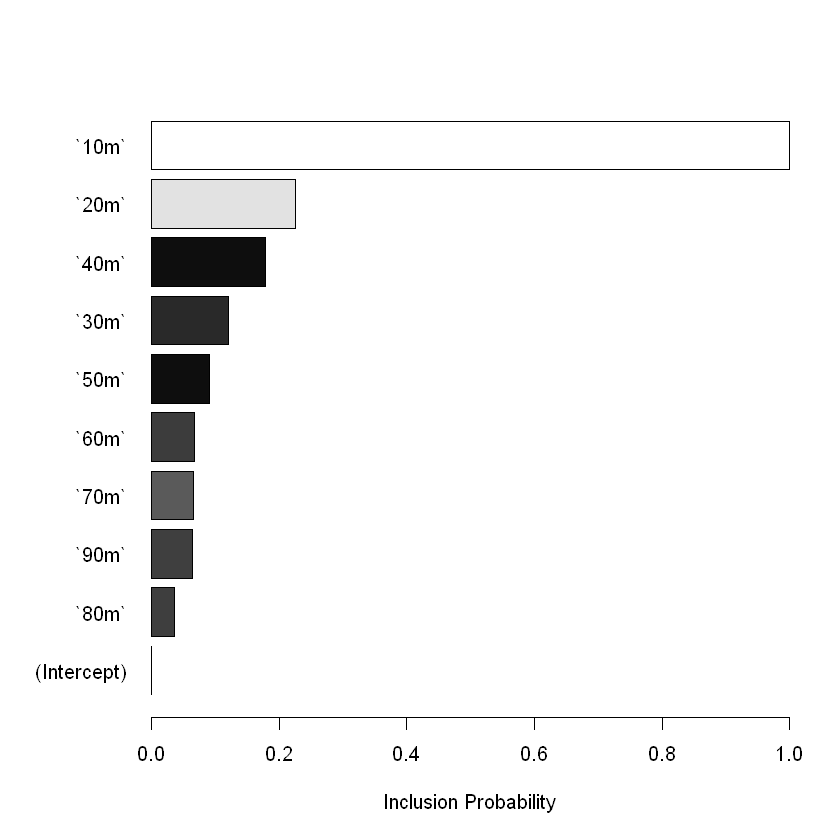

In [8]:
plot(rlls_model, 'coefficients')

## Forecasting

In [9]:
rlls_model_pred <- predict(rlls_model, newdata = gib_test,
                          horizon = 28)

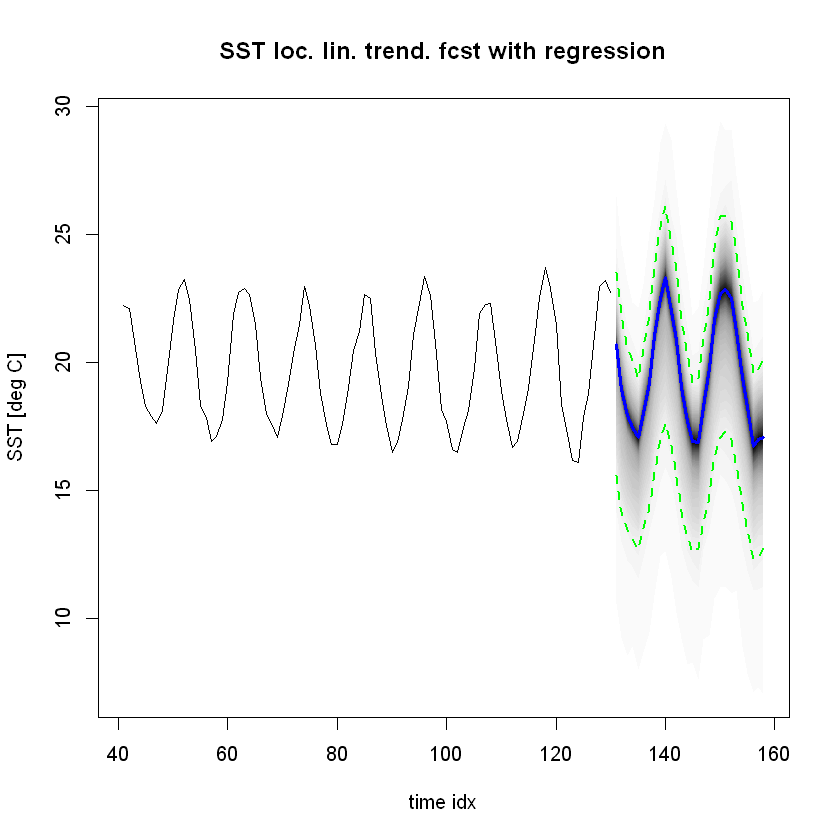

In [10]:
plot(rlls_model_pred, plot.original = 90,
    main = 'SST loc. lin. trend. fcst with regression',
    xlab = 'time idx',
    ylab = 'SST [deg C]')

## Model 2
Local linear trend, seasonal and two linear component model

In [11]:
rlls_model2 <- bsts(SST ~ ., state.specification = ss, 
                   data = gib_train, niter = 1000, ping = 0,
                  expected.model.size=2)

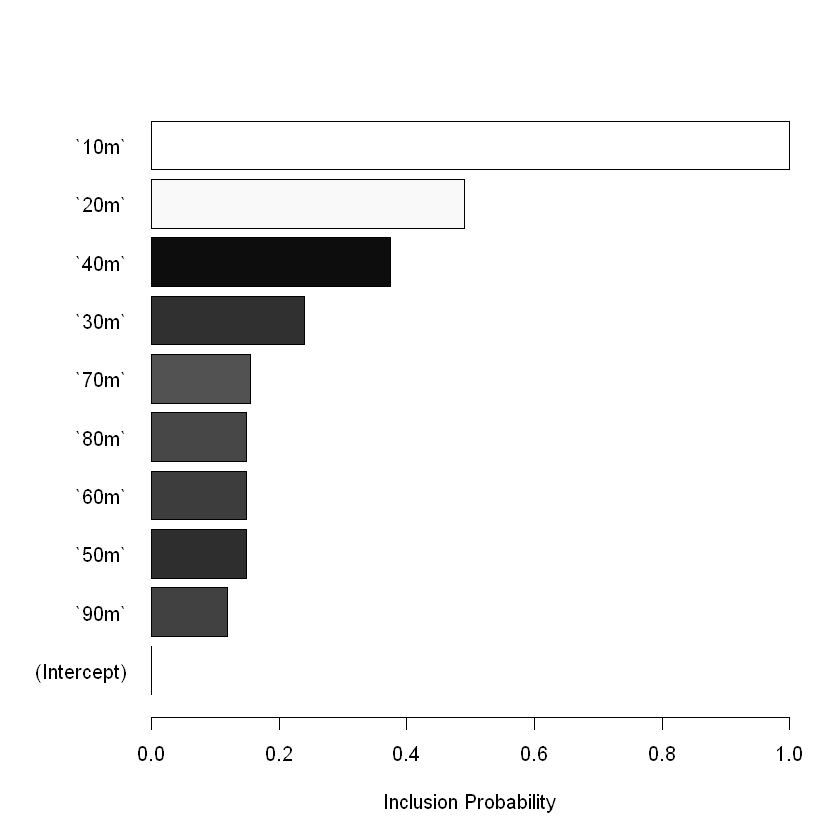

In [12]:
plot(rlls_model2, 'coefficients')